# Stroke Prediction|Multiple Models|Classification

## Stroke Prediction

### Importing Libraries

In [2]:
#Importing all the neccessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

### Importing Data

In [3]:
#Loading the required data
df = pd.read_csv('C:/Users/gabri/Downloads/Diabetes/diabetes_data.csv')
pd.set_option('display.max_columns',30)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

### Data Analysis

In [5]:
#Assessing for missing values
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [6]:
#Evaluating number of unique values in each column
unique_vals=[]

for col in df.columns:
    unival=df[col].nunique()
    unique_vals.append(unival)

#Presenting the findings using a dataframe
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns)

,Unique_Values
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


It is evident from the above findings that most of the features are categorical in nature and only a few have continuous values.

In [7]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [10]:
cols=['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
       'Diabetes', 'HighBP', 'Stroke']

************************************************************************************************


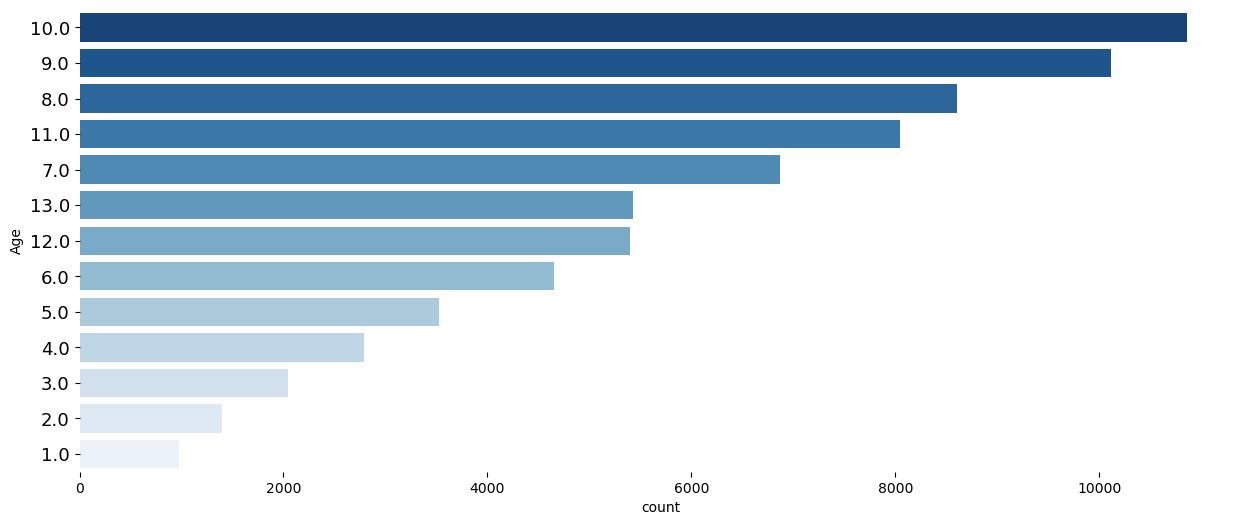

************************************************************************************************


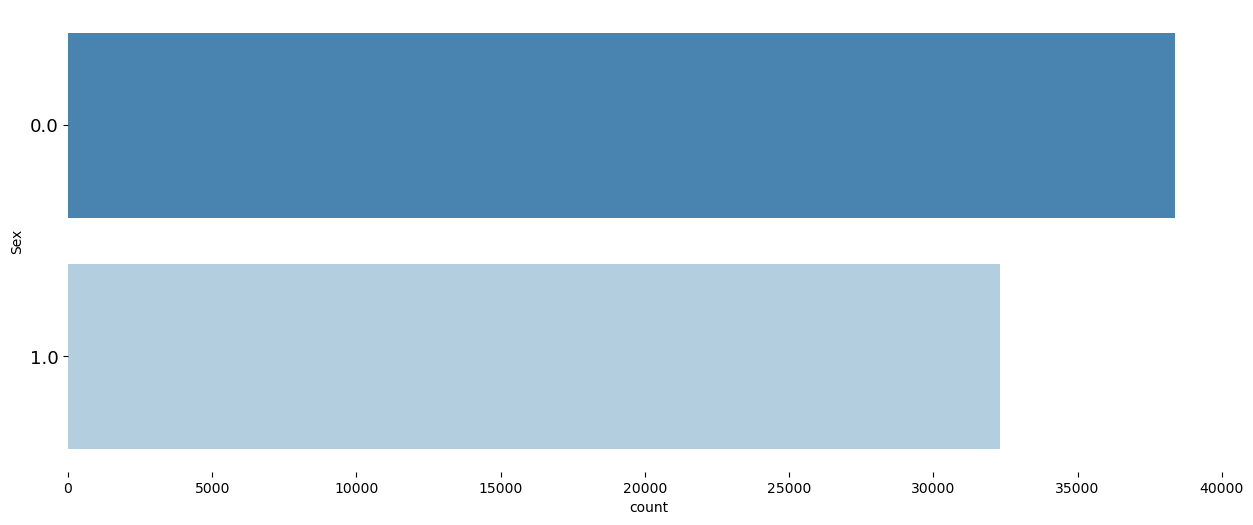

************************************************************************************************


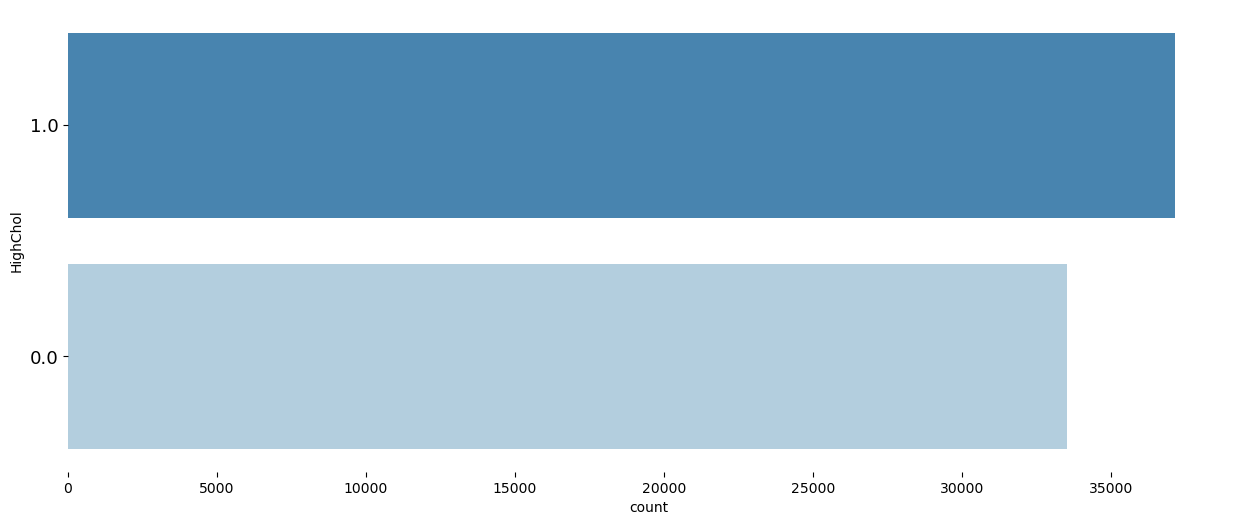

************************************************************************************************


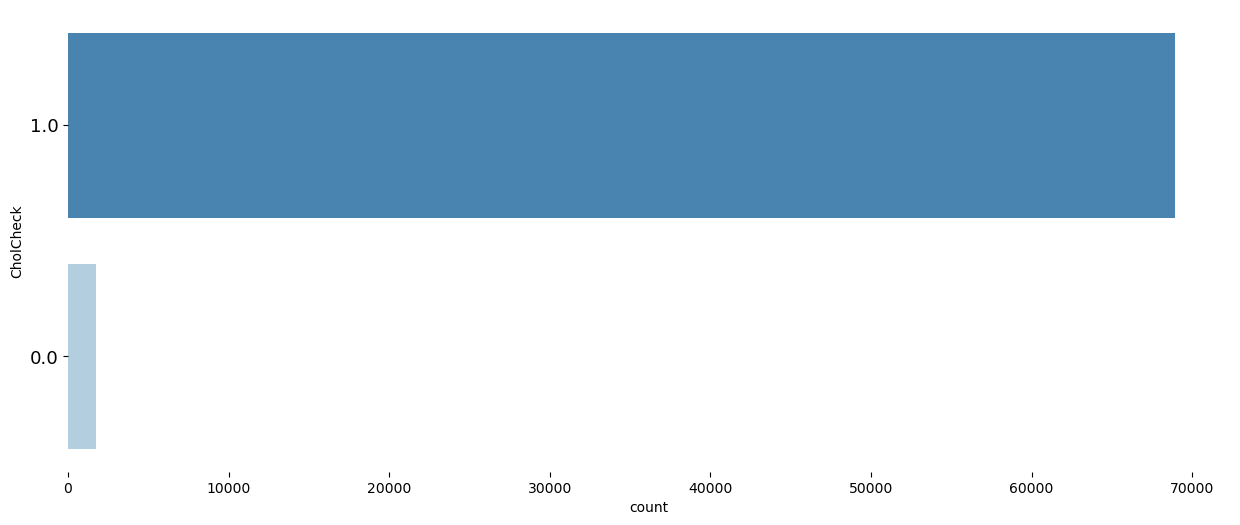

************************************************************************************************


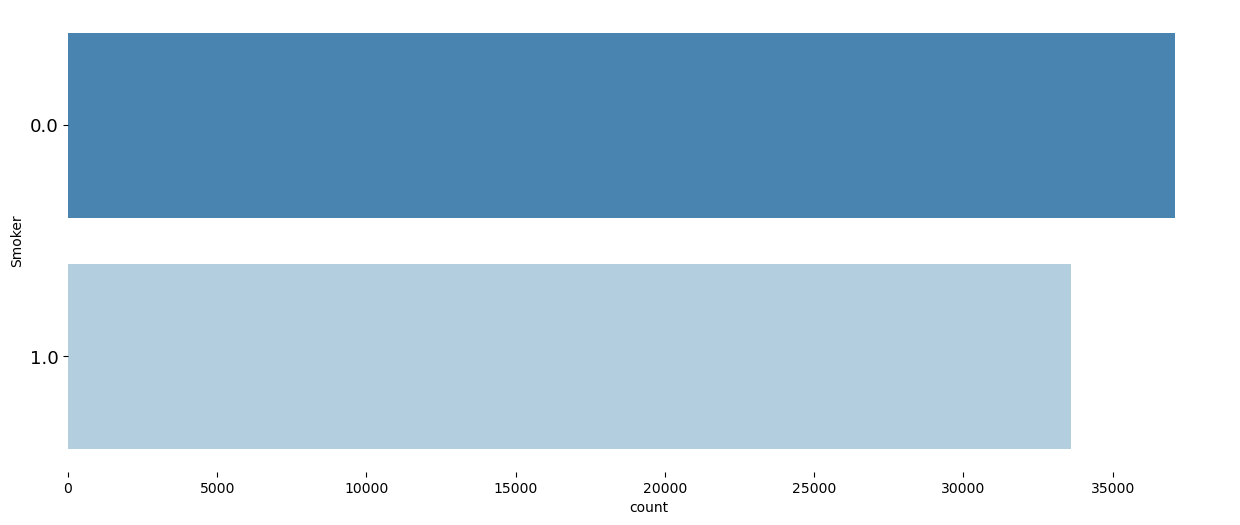

************************************************************************************************


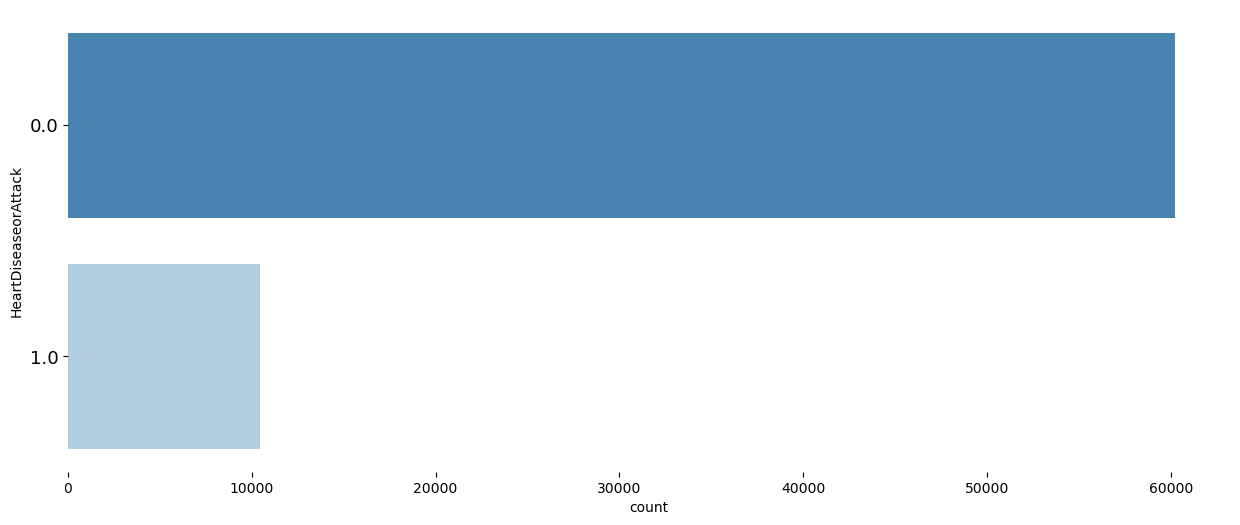

************************************************************************************************


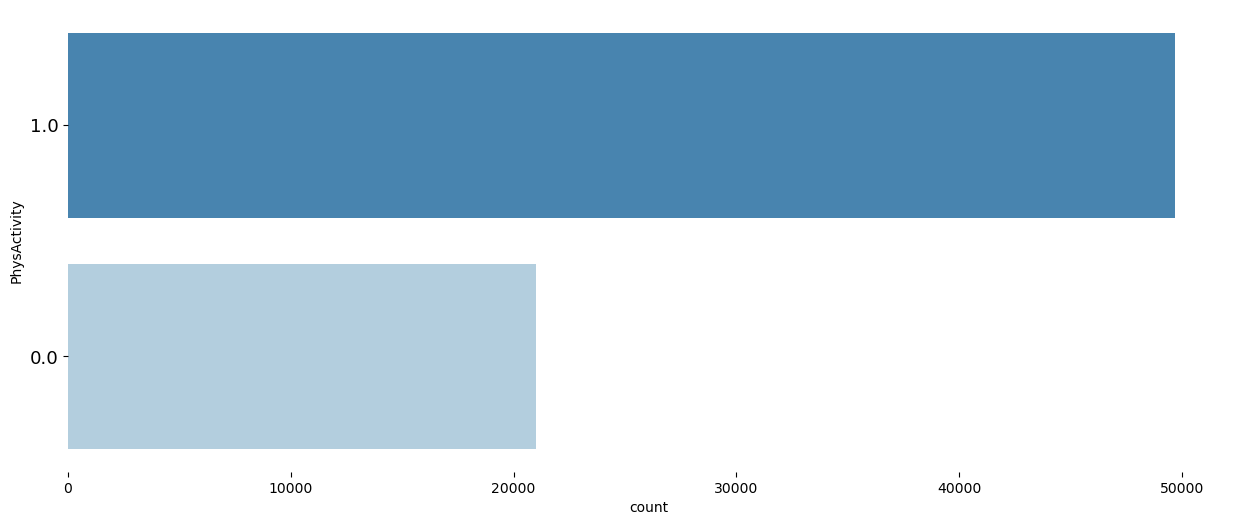

************************************************************************************************


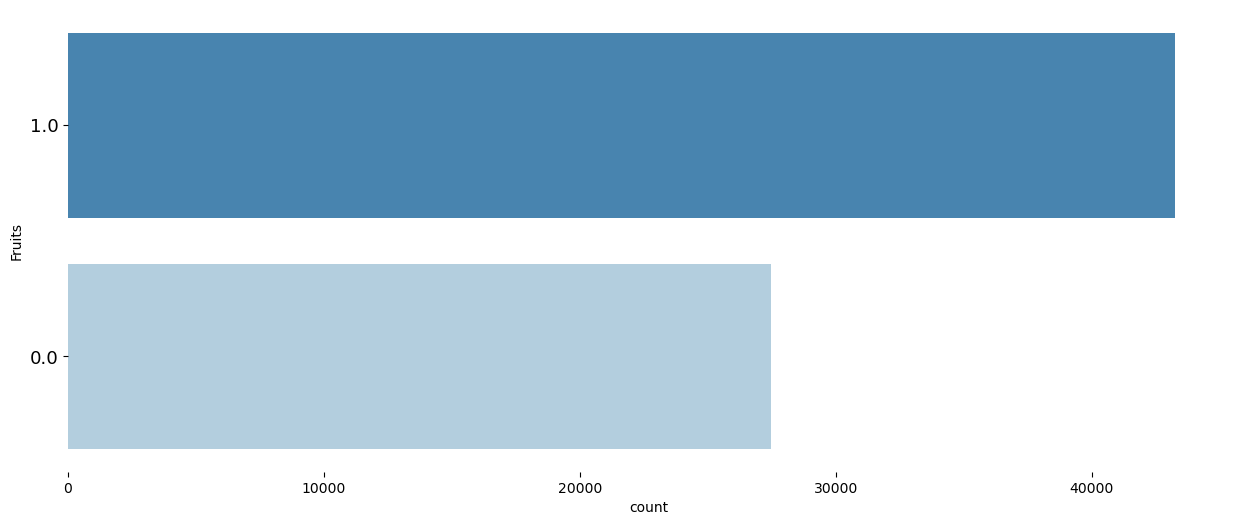

************************************************************************************************


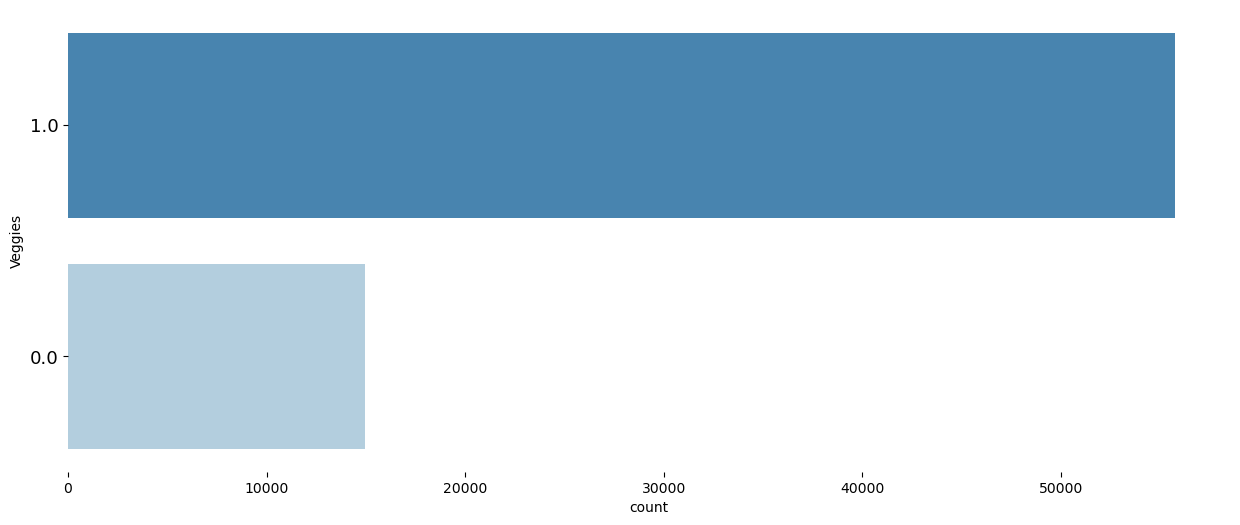

************************************************************************************************


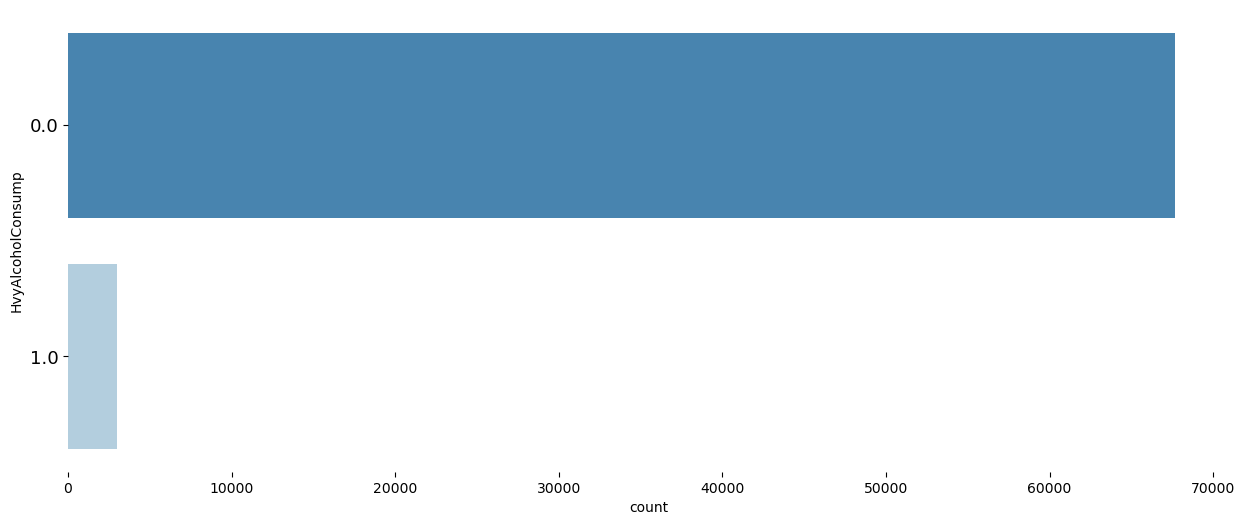

************************************************************************************************


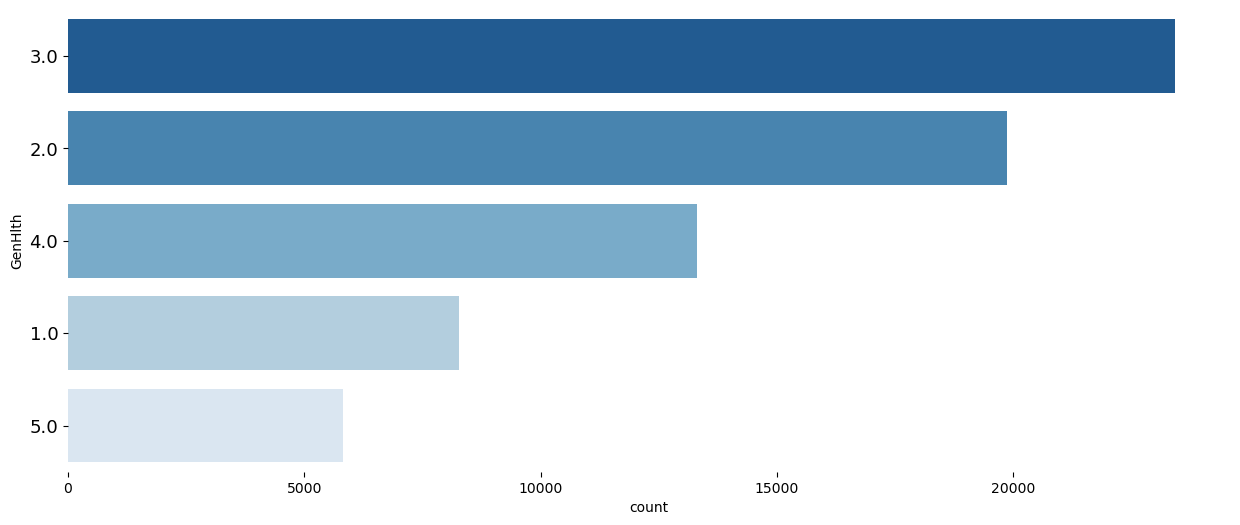

************************************************************************************************


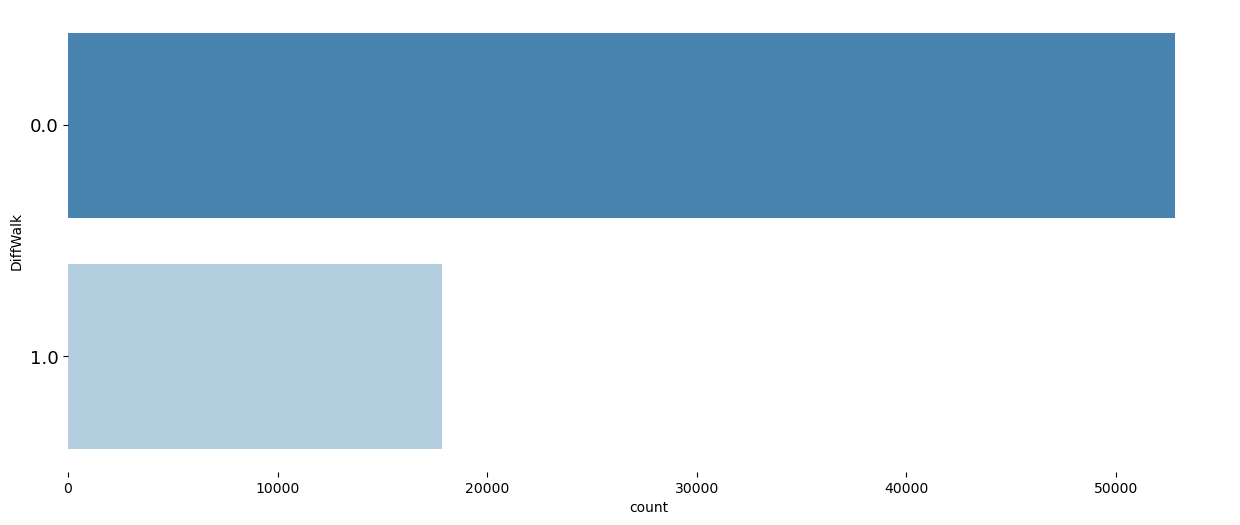

************************************************************************************************


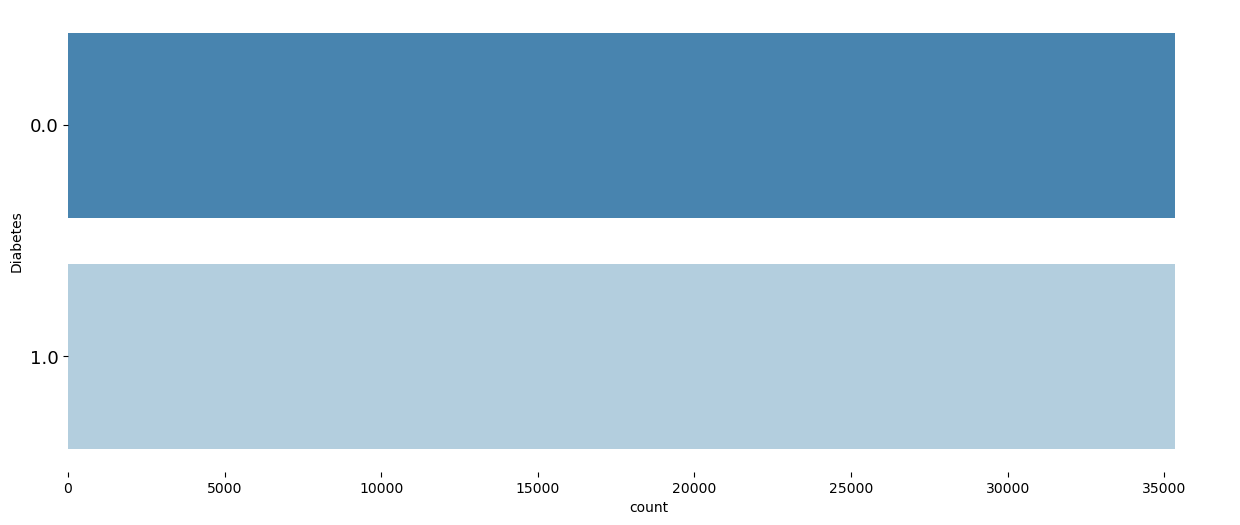

************************************************************************************************


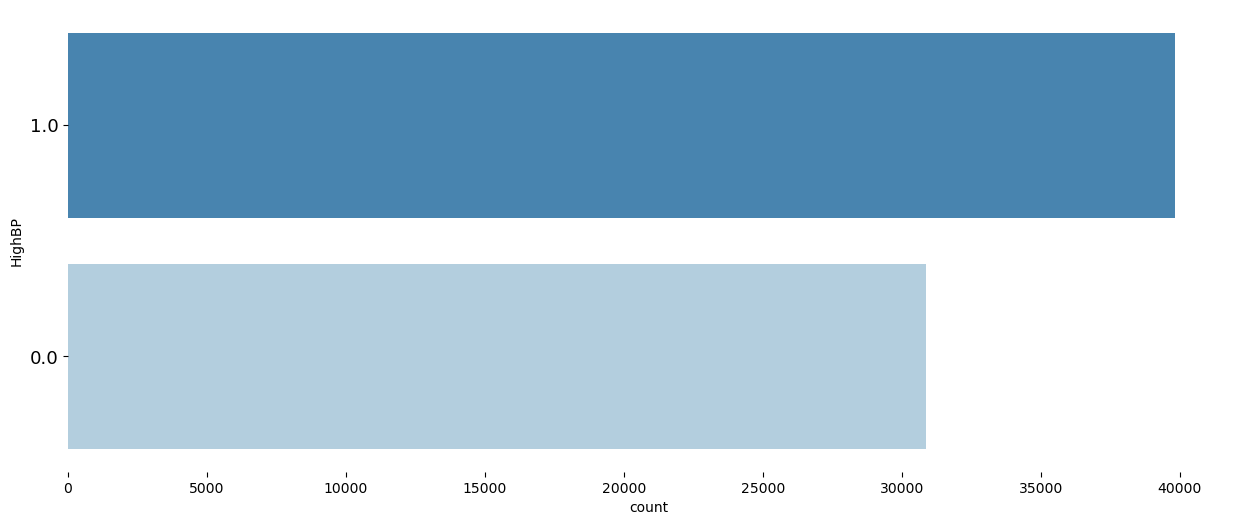

************************************************************************************************


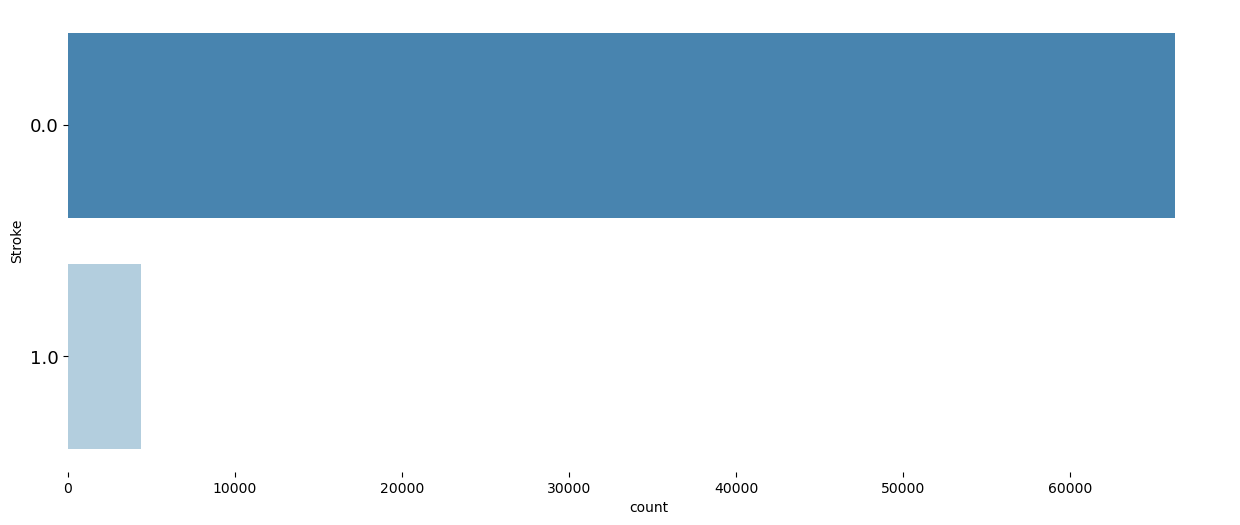

In [11]:
#Presenting the countplots for categorical features
for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
  plt.ylabel(i)
  plt.yticks(fontsize=13)
  print("************************************************************************************************")
  plt.box(False)
  plt.show()

It can be seen that features like CholCheck and HvyAlcoholConsump are heavily unbalanced and may skew or introduce bias in the model thus they will not be considered while building the model.

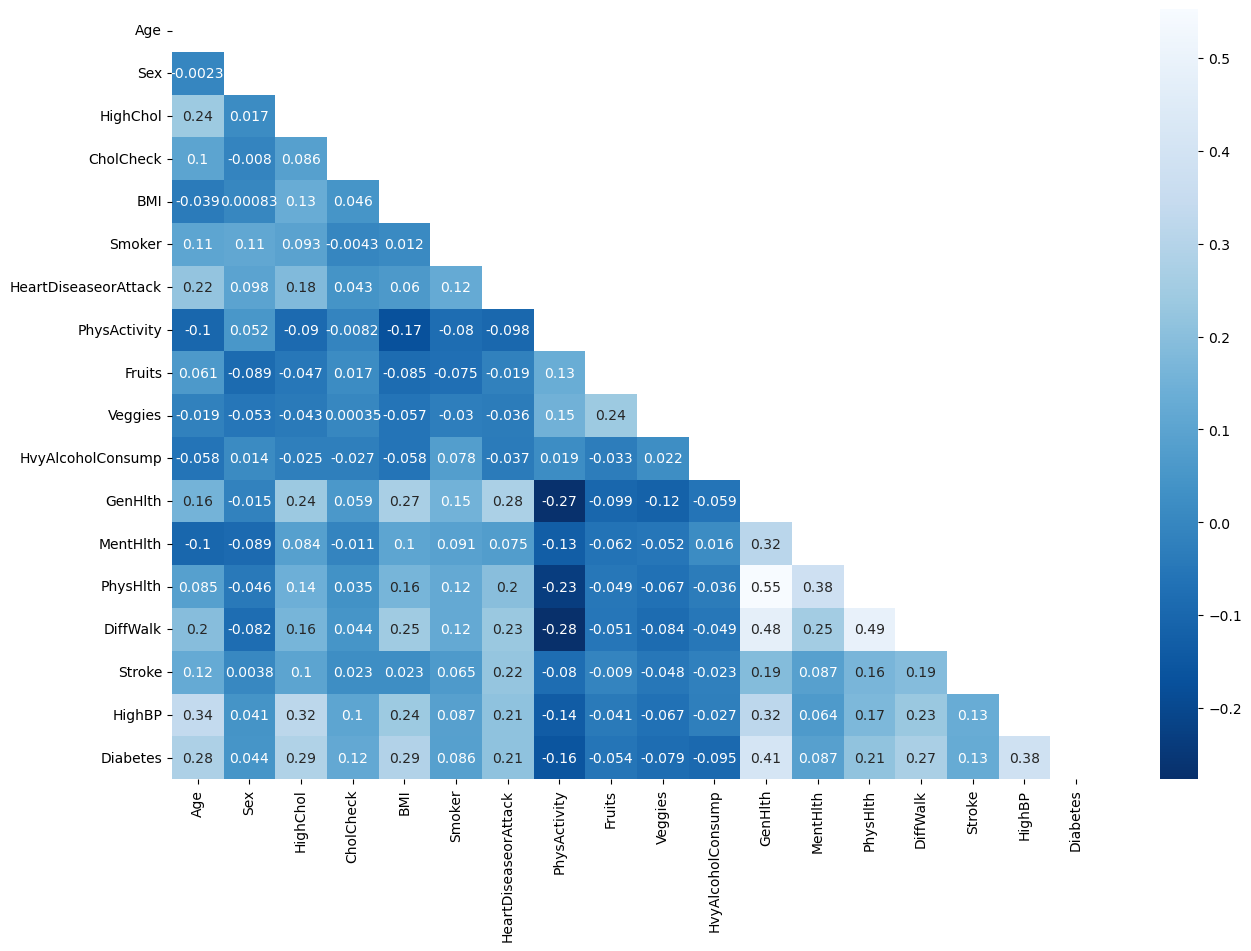

In [12]:
#Building a heatmap using correlation
plt.figure(figsize=(15,10))
mask=np.triu(df.corr())
sns.heatmap(df.corr(),mask=mask,annot=True,cmap='Blues_r')
plt.show()

Now using this heatmap those features that might not contribute enough to the model depending on their correlation to the target(Stroke) column will be dropped from the dataset

### Feat Engineering

In [13]:
#dropping features that are not required
data=df.drop(['Sex','CholCheck','Smoker','Fruits','Veggies','HvyAlcoholConsump','MentHlth'],axis=1)
data.head()

,Age,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0.0,26.0,0.0,1.0,3.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#splitting the data into input data features and target 
X=data.drop('Stroke',axis=1)
y=data['Stroke']

### Train-Test-Split and Scaling

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=105,stratify=y)

In [16]:
print(X_train.shape)
print(X_test.shape)

(49484, 10)
(21208, 10)


In [17]:
#scaling the data so that comparatively larger values do not make the model biased
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Defining Generic Model

In [18]:
accuracy_model=pd.DataFrame(columns=['Model','Accuracy'])

In [21]:
#Defining a function to standardize the model testing process
def model_train_test(model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_estimator(model,X_test_scaled,y_test)

### Testing Different Models

#### LOGISTIC REGRESSION

c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = 

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19889
         1.0       0.33      0.00      0.00      1319

    accuracy                           0.94     21208
   macro avg       0.64      0.50      0.49     21208
weighted avg       0.90      0.94      0.91     21208



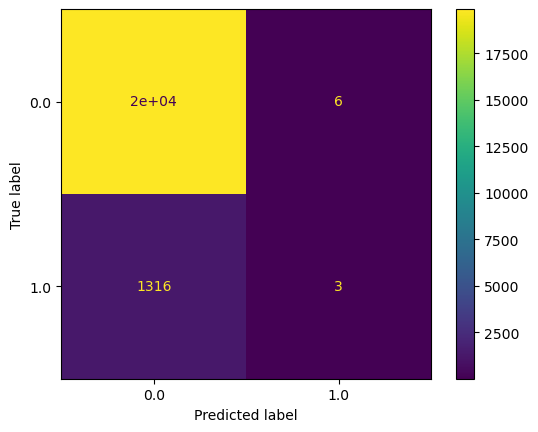

In [22]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
model_train_test(logreg_cv)

#### GAUSSIAN NAIVE BAYES

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91     19889
         1.0       0.20      0.48      0.28      1319

    accuracy                           0.85     21208
   macro avg       0.58      0.68      0.60     21208
weighted avg       0.91      0.85      0.88     21208



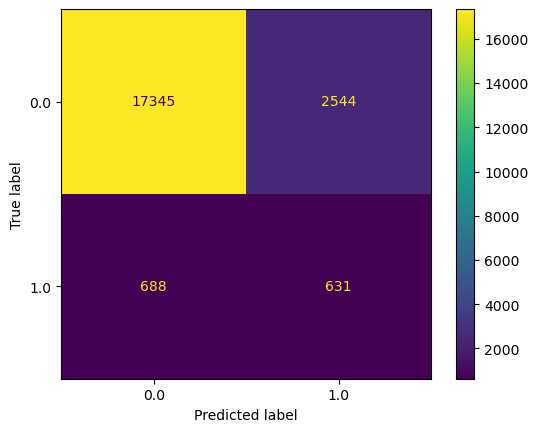

In [23]:
gnb=GaussianNB()
model_train_test(gnb)

#### BERNOULLI NAIVE BAYES

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     19889
         1.0       0.22      0.31      0.26      1319

    accuracy                           0.89     21208
   macro avg       0.59      0.62      0.60     21208
weighted avg       0.91      0.89      0.90     21208



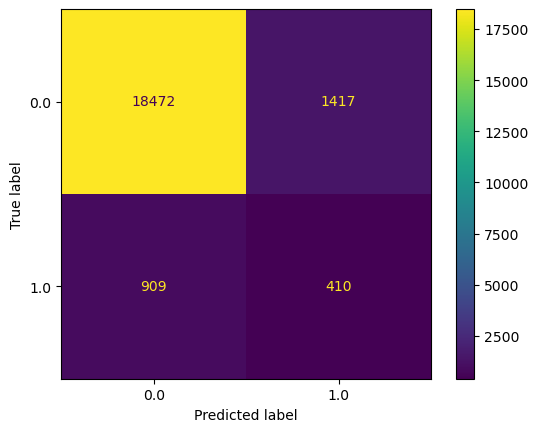

In [24]:
bnb=BernoulliNB()
model_train_test(bnb)

#### K-NEAREST NEIGHBOURS

In [25]:
knn = KNeighborsClassifier()

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


In [26]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 18}
Accuracy for our training dataset with tuning is : 93.73%


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19889
         1.0       0.19      0.00      0.01      1319

    accuracy                           0.94     21208
   macro avg       0.57      0.50      0.49     21208
weighted avg       0.89      0.94      0.91     21208



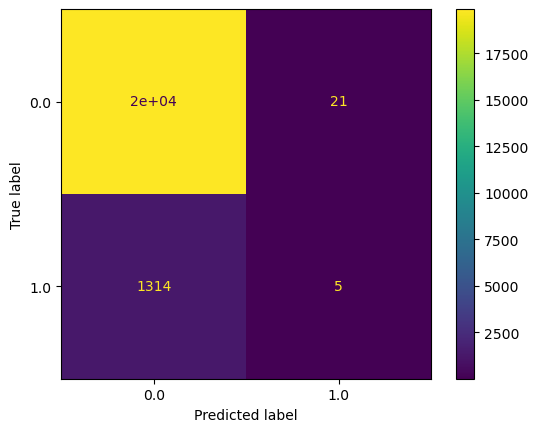

In [27]:
model_train_test(KNeighborsClassifier(n_neighbors=18))

#### DECISION TREE

In [28]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\gabri\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [29]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}
Accuracy for our training dataset with tuning is : 93.78%


In [30]:
model_train_test(DecisionTreeClassifier(ccp_alpha=0.1,criterion='gini',max_depth=5,max_features='auto'))

InvalidParameterError: The 'max_features' parameter of DecisionTreeClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.